In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('creditcard.csv')

In [4]:
# 2. Data Preprocessing: Check for missing values and scale the data
print("Missing values:", data.isnull().sum().sum())  # No missing values in this dataset

Missing values: 0


In [5]:
# Split the features and labels
X = data.drop('Class', axis=1)
y = data['Class']

In [6]:
# Scale the 'Amount' and 'Time' columns
scaler = StandardScaler()
X[['Amount', 'Time']] = scaler.fit_transform(X[['Amount', 'Time']])

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# 3. Implementing classification models (simulating autocomplete and autocorrect as classification)

In [9]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [12]:
# Check the shapes of X_train and y_train to ensure compatibility
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (199364, 30)
y_train shape: (199364,)


In [17]:
# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [19]:
# 5. Define and measure performance metrics
def print_metrics(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

In [20]:
print_metrics(y_test, y_pred_log, "Logistic Regression")
print_metrics(y_test, y_pred_rf, "Random Forest")



Logistic Regression Metrics:
Accuracy: 0.9993
Precision: 0.8776
Recall: 0.6324
F1-Score: 0.7350

Random Forest Metrics:
Accuracy: 0.9996
Precision: 0.9474
Recall: 0.7941
F1-Score: 0.8640


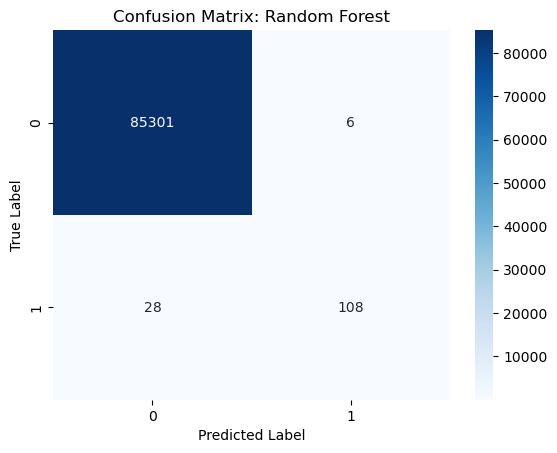

In [21]:
# 7. Compare models
# Visualize Confusion Matrix for Random Forest
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

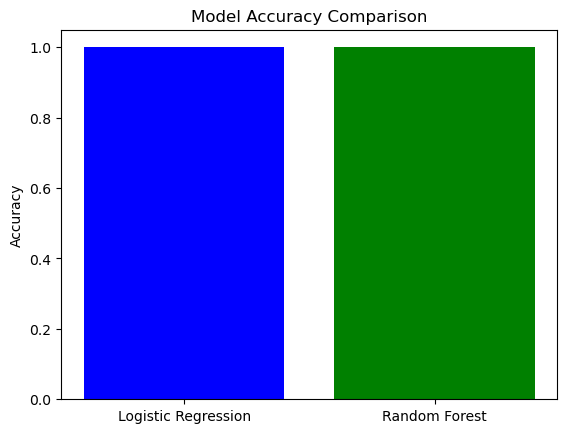

In [22]:
# 8. Visualizing performance comparison
model_names = ['Logistic Regression', 'Random Forest']
accuracy_scores = [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_rf)]
plt.bar(model_names, accuracy_scores, color=['blue', 'green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()